# Red Wine Quality Prediction

## Importing all necessary libraries

In [4]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, metrics

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("redwinequality.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Preprocessing

In [10]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [11]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.rename(columns={'quality': 'good-quality'}, inplace=True)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good-quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


## Exploratory Data Analysis

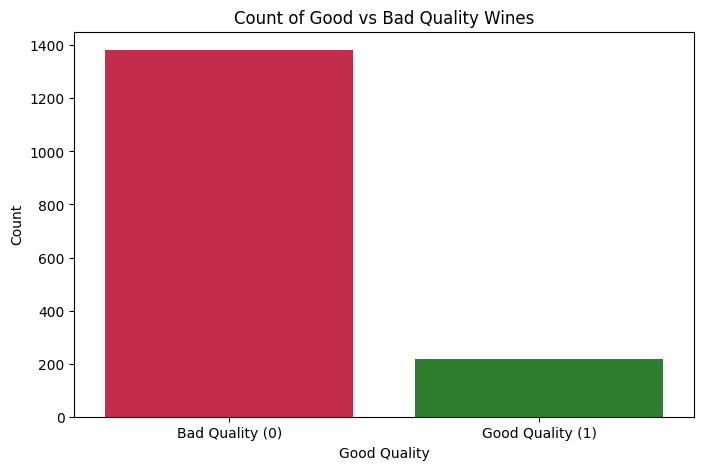

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='good-quality', hue='good-quality', data=df, palette={0: 'crimson', 1: 'forestgreen'}, legend=False)
plt.xlabel('Good Quality')
plt.ylabel('Count')
plt.title('Count of Good vs Bad Quality Wines')
plt.xticks([0, 1], ['Bad Quality (0)', 'Good Quality (1)'])
plt.show()

In [14]:
good_quality_count = df['good-quality'].value_counts()
good_percent = round((good_quality_count[1] / len(df)) * 100, 2)
bad_percent = round((good_quality_count[0] / len(df)) * 100, 2)

print("Wine Quality Distribution Summary:\n")
print(f"✅ Good Quality Wines (1): {good_quality_count[1]} ({good_percent}%)")
print(f"❌ Bad Quality Wines (0): {good_quality_count[0]} ({bad_percent}%)")

Wine Quality Distribution Summary:

✅ Good Quality Wines (1): 217 (13.57%)
❌ Bad Quality Wines (0): 1382 (86.43%)


## Analysis of Correlation between features

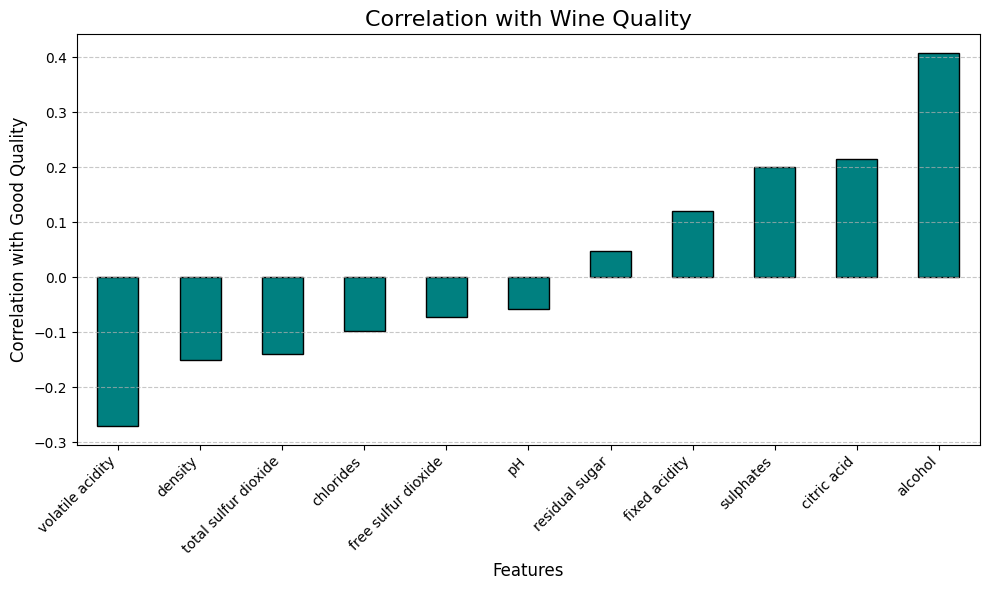

In [16]:
# Plot correlation with good quality
plt.figure(figsize=(10, 6))
df.corr()['good-quality'][:-1].sort_values().plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)

# Add labels and title
plt.title('Correlation with Wine Quality', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Good Quality', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

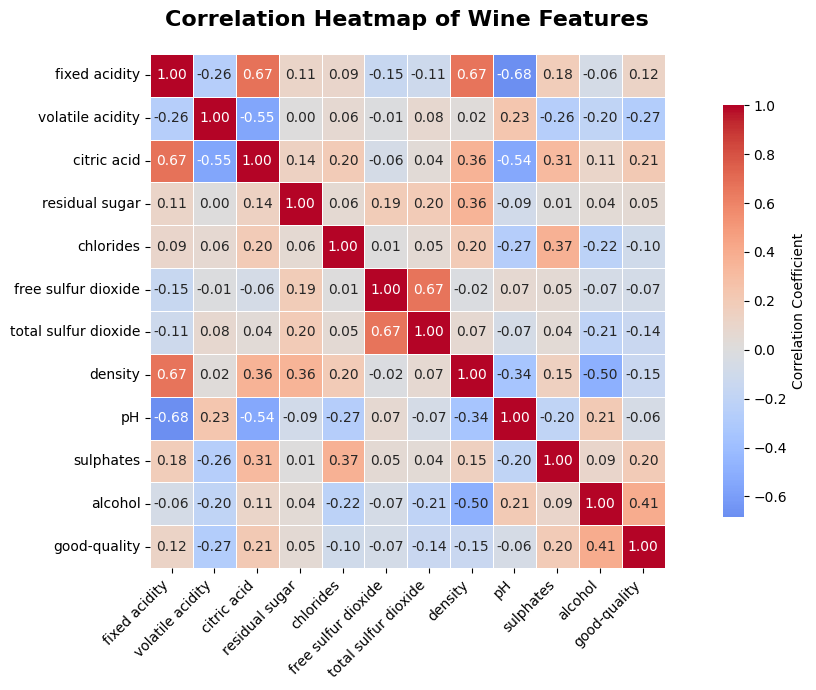

In [17]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df.corr(),
    annot=True,           # Show correlation numbers
    fmt=".2f",            # Format to 2 decimal places
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

plt.title("Correlation Heatmap of Wine Features", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

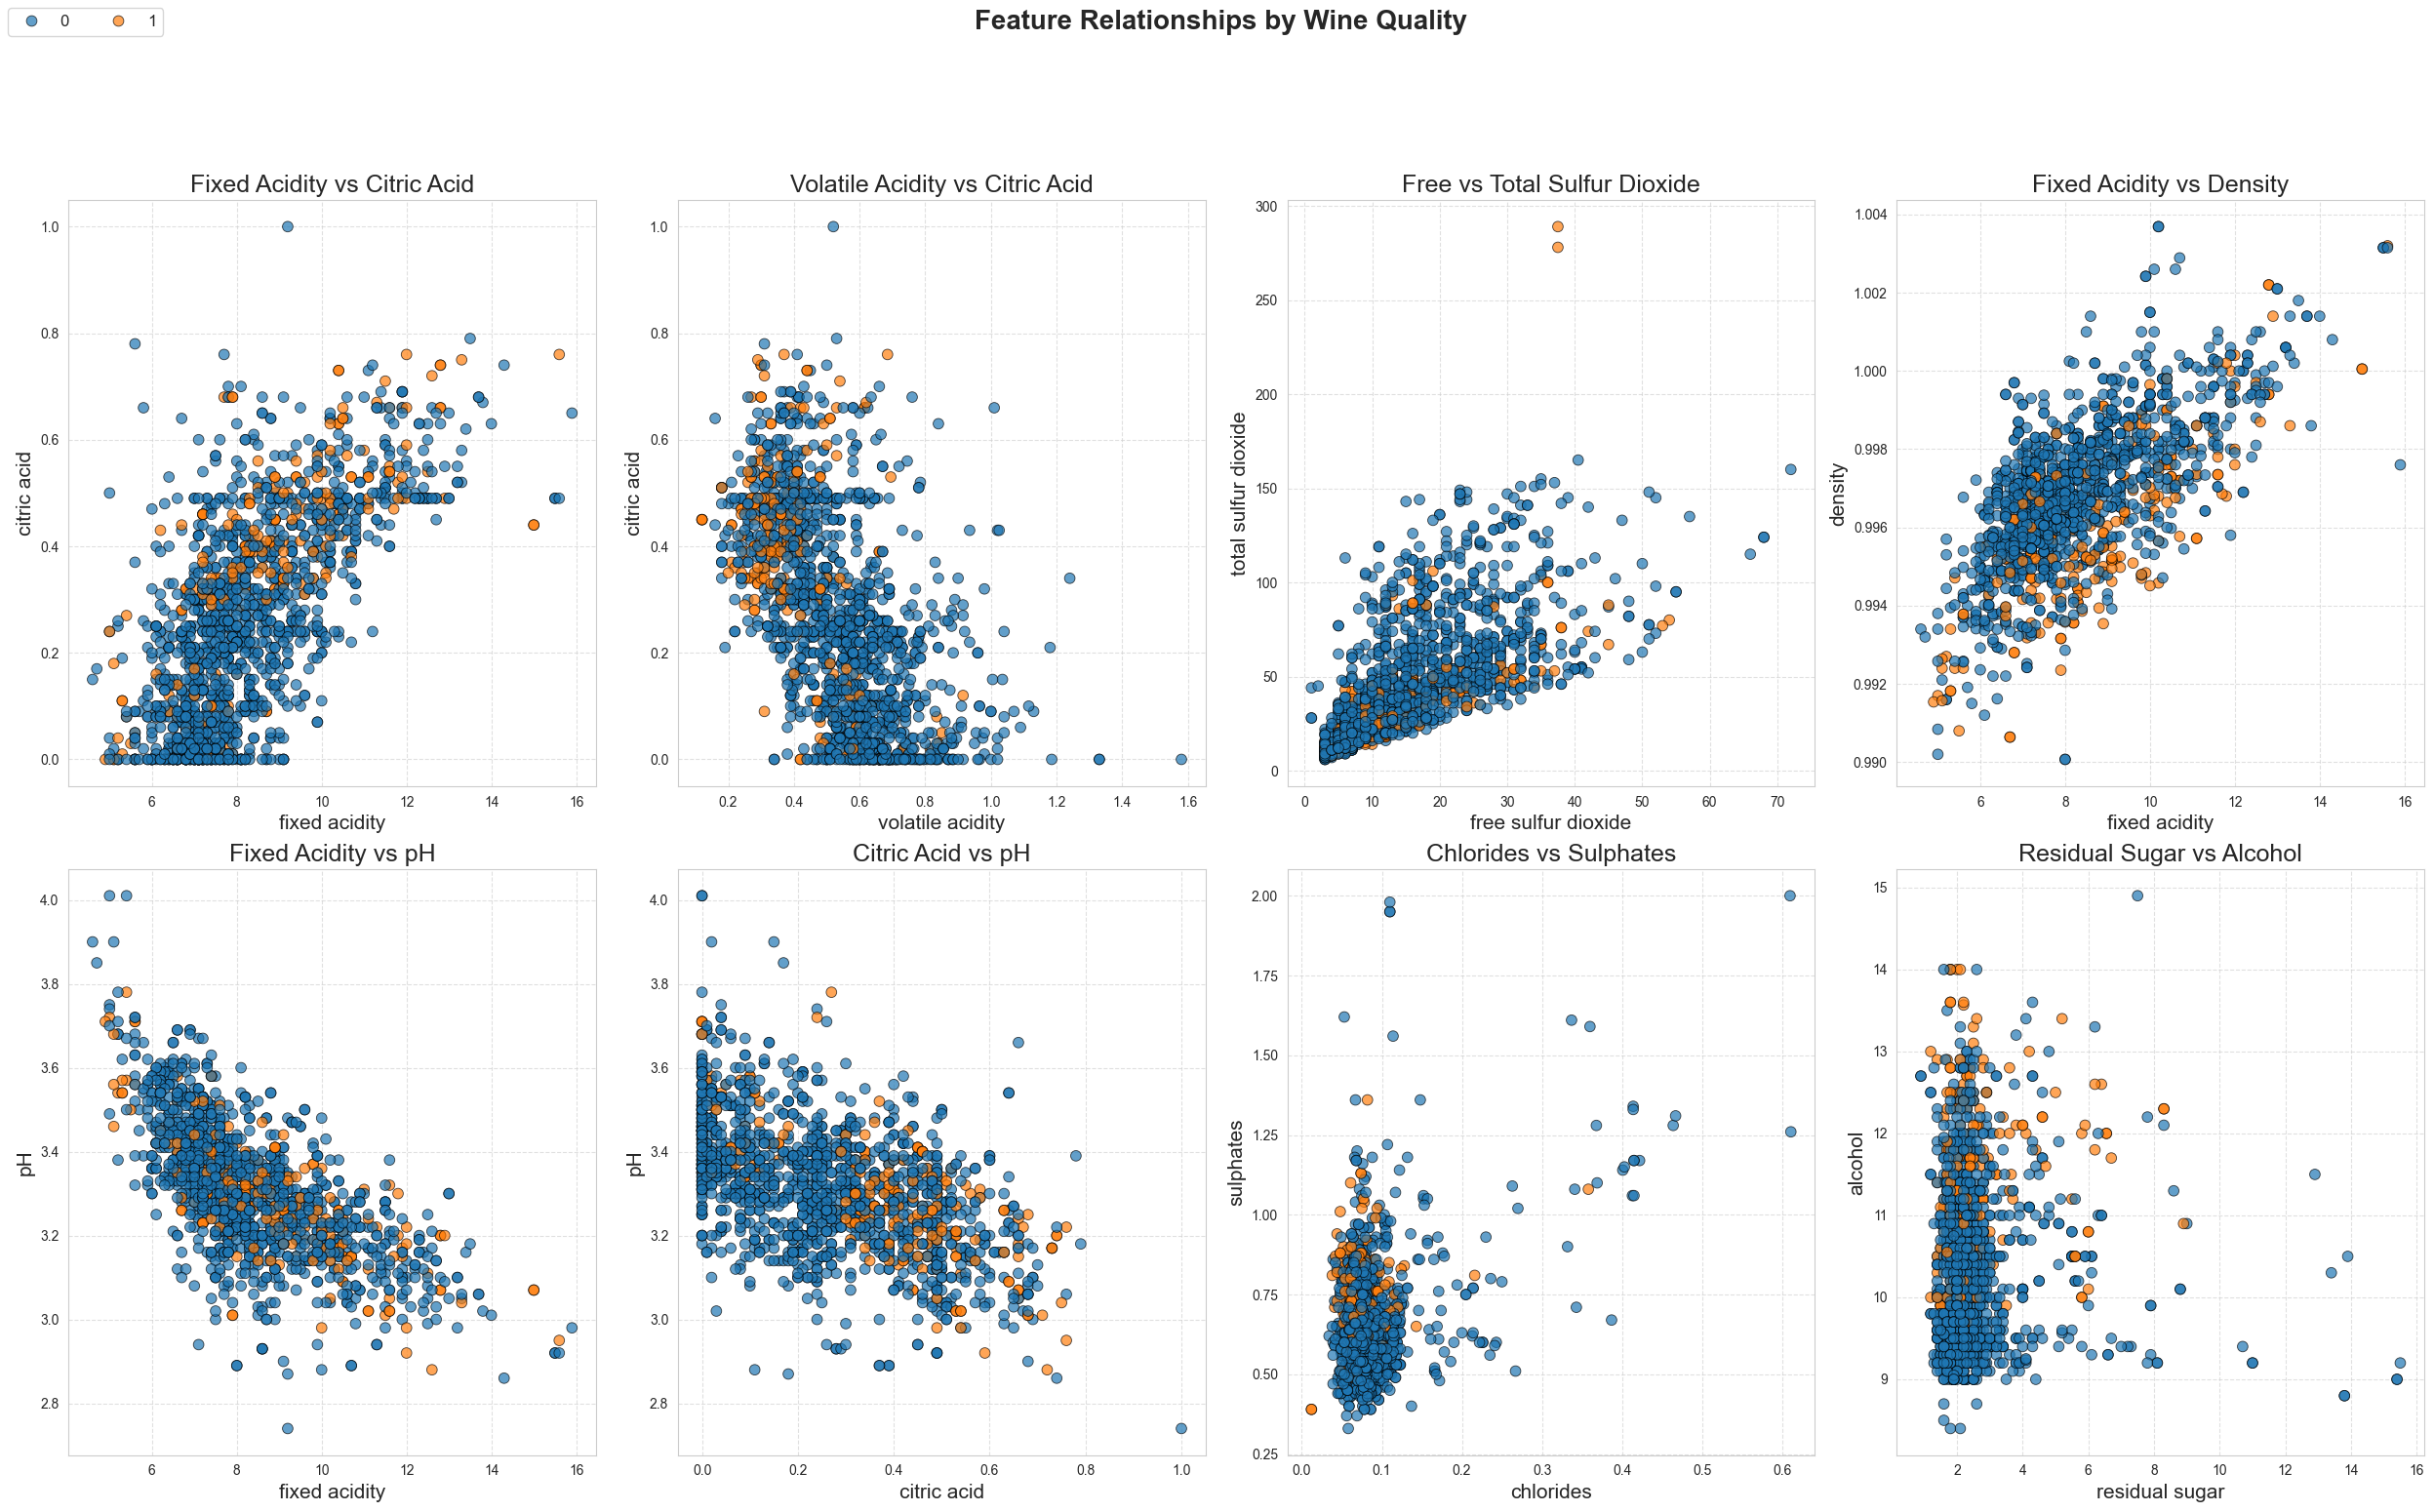

In [18]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 4, figsize=(25, 15))
fig.suptitle('Feature Relationships by Wine Quality', fontsize=20, fontweight='bold', y=1.03)

scatter_params = {
    "hue": "good-quality",
    "data": df,
    "alpha": 0.7,
    "s": 60,  # point size
    "edgecolor": "black",
}

sns.scatterplot(x='fixed acidity', y='citric acid', ax=ax[0, 0], **scatter_params)
ax[0, 0].set_title('Fixed Acidity vs Citric Acid', fontsize=18)

sns.scatterplot(x='volatile acidity', y='citric acid', ax=ax[0, 1], **scatter_params)
ax[0, 1].set_title('Volatile Acidity vs Citric Acid', fontsize=18)

sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', ax=ax[0, 2], **scatter_params)
ax[0, 2].set_title('Free vs Total Sulfur Dioxide', fontsize=18)

sns.scatterplot(x='fixed acidity', y='density', ax=ax[0, 3], **scatter_params)
ax[0, 3].set_title('Fixed Acidity vs Density', fontsize=18)

sns.scatterplot(x='fixed acidity', y='pH', ax=ax[1, 0], **scatter_params)
ax[1, 0].set_title('Fixed Acidity vs pH', fontsize=18)

sns.scatterplot(x='citric acid', y='pH', ax=ax[1, 1], **scatter_params)
ax[1, 1].set_title('Citric Acid vs pH', fontsize=18)

sns.scatterplot(x='chlorides', y='sulphates', ax=ax[1, 2], **scatter_params)
ax[1, 2].set_title('Chlorides vs Sulphates', fontsize=18)

sns.scatterplot(x='residual sugar', y='alcohol', ax=ax[1, 3], **scatter_params)
ax[1, 3].set_title('Residual Sugar vs Alcohol', fontsize=18)

for axes in ax.flatten():
    axes.set_xlabel(axes.get_xlabel(), fontsize=15)
    axes.set_ylabel(axes.get_ylabel(), fontsize=15)
    axes.tick_params(axis='both', labelsize=10)
    axes.grid(True, linestyle='--', alpha=0.6)

# Manage legend (only one, not repeated)
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=2, frameon=True, fontsize=12, title_fontsize=16)
for axes in ax.flatten():
    axes.get_legend().remove()

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # leave space for the suptitle and legend
plt.show()

## Model Taining and Train Test Split

In [20]:
X = df.drop(columns='good-quality')
y = df['good-quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
)

In [21]:
lr = LogisticRegression()
lr

LogisticRegression()

In [22]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8838248436103664

In [23]:
# testing the model
y_lr_pred = lr.predict(X_test)
accuracy_score(y_test, y_lr_pred)

0.86875

## Support Vector Machine (SVM)

In [25]:
clf = svm.SVC(kernel = "rbf")
clf

SVC()

In [26]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8668453976764968

In [27]:
y_sv_pred = clf.predict(X_test)
accuracy_score(y_test, y_sv_pred)

0.8625

## Decision Tree Classifier

In [29]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [30]:
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)

1.0

In [31]:
y_tr_pred = dtree.predict(X_test)
accuracy_score(y_test, y_tr_pred)

0.8583333333333333

## K-Nearest Neighbors (KNN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [34]:
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9079535299374442

In [35]:
y_knn_pred = knn.predict(X_test)
accuracy_score(y_test, y_knn_pred)

0.8583333333333333

# Model Evaluation

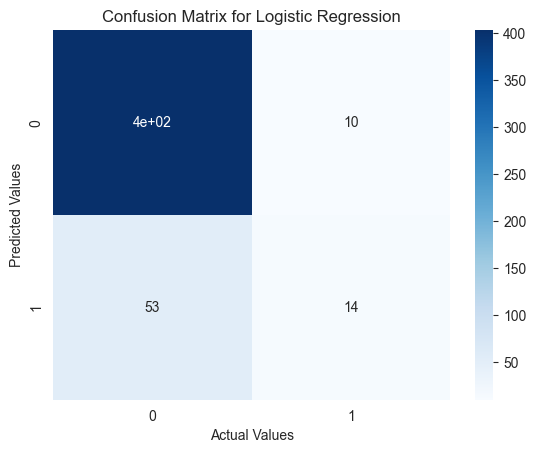

In [37]:
# logistic regression model evaluation
sns.heatmap(confusion_matrix(y_test, y_lr_pred), annot=True, cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [38]:
print('\nLogistic Regression Model Accuracy: ', accuracy_score(y_test, y_lr_pred), "\n")
print('Logistic Regression Model f1 score: ', metrics.f1_score(y_test, y_lr_pred), "\n")
print('Logistic Regression Model MAE: ', metrics.mean_absolute_error(y_test, y_lr_pred), "\n")
print('Logistic Regression Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_lr_pred)), "\n")



Logistic Regression Model Accuracy:  0.86875 

Logistic Regression Model f1 score:  0.30769230769230765 

Logistic Regression Model MAE:  0.13125 

Logistic Regression Model RMSE:  0.362284418654736 



## Support Vector Machine's Confusion Matrix

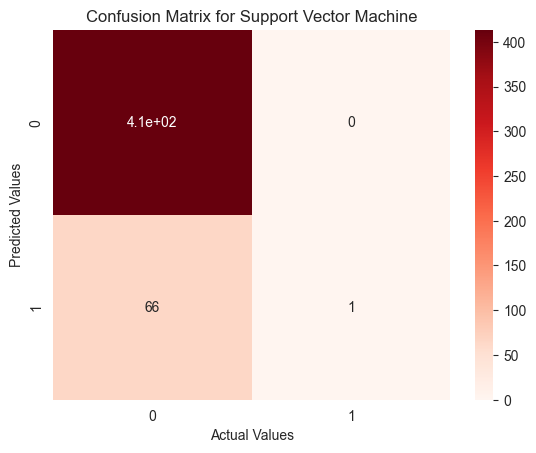

In [40]:
sns.heatmap(confusion_matrix(y_test, y_sv_pred), annot=True, cmap='Reds')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [41]:
print('\nSupport Vector Machine Model Accuracy: ', accuracy_score(y_test, y_sv_pred), "\n")
print('Support Vector Machine Model f1 score: ', metrics.f1_score(y_test, y_sv_pred), "\n")
print('Support Vector Machine Model MAE: ', metrics.mean_absolute_error(y_test, y_sv_pred), "\n")
print('Support Vector Machine Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_sv_pred)), "\n")


Support Vector Machine Model Accuracy:  0.8625 

Support Vector Machine Model f1 score:  0.029411764705882353 

Support Vector Machine Model MAE:  0.1375 

Support Vector Machine Model RMSE:  0.37080992435478316 



## Decision Tree's Confusion Matrix

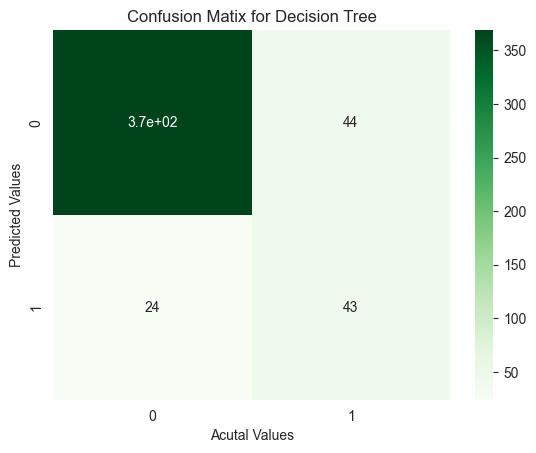

In [43]:
sns.heatmap(confusion_matrix(y_test, y_tr_pred), annot=True, cmap='Greens')
plt.ylabel("Predicted Values")
plt.xlabel("Acutal Values")
plt.title("Confusion Matix for Decision Tree")
plt.show()

In [44]:
print('Decision Tree Model Accuracy: ', accuracy_score(y_test, y_tr_pred), "\n")
print('Decision Tree Model f1 score: ', metrics.f1_score(y_test, y_tr_pred), "\n")
print('Decision Tree Model MAE: ', metrics.mean_absolute_error(y_test, y_tr_pred), "\n")
print('Decision Tree Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_tr_pred)), "\n")

Decision Tree Model Accuracy:  0.8583333333333333 

Decision Tree Model f1 score:  0.5584415584415584 

Decision Tree Model MAE:  0.14166666666666666 

Decision Tree Model RMSE:  0.3763863263545405 



## K-Nearest Neighbors's Confusion Matix

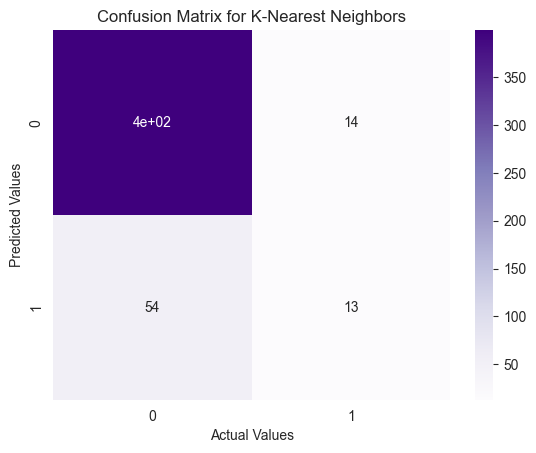

In [46]:
sns.heatmap(confusion_matrix(y_test, y_knn_pred), annot=True, cmap='Purples')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

In [47]:
print('K-Nearest Neighbors Model Accuracy: ', accuracy_score(y_test, y_knn_pred), "\n")
print('K-Nearest Neighbors Model f1 score: ', metrics.f1_score(y_test, y_knn_pred), "\n")
print('K-Nearest Neighbors Model MAE: ', metrics.mean_absolute_error(y_test, y_knn_pred), "\n")
print('K-Nearest Neighbors Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_knn_pred)), "\n")

K-Nearest Neighbors Model Accuracy:  0.8583333333333333 

K-Nearest Neighbors Model f1 score:  0.276595744680851 

K-Nearest Neighbors Model MAE:  0.14166666666666666 

K-Nearest Neighbors Model RMSE:  0.3763863263545405 



<Figure size 1000x600 with 0 Axes>

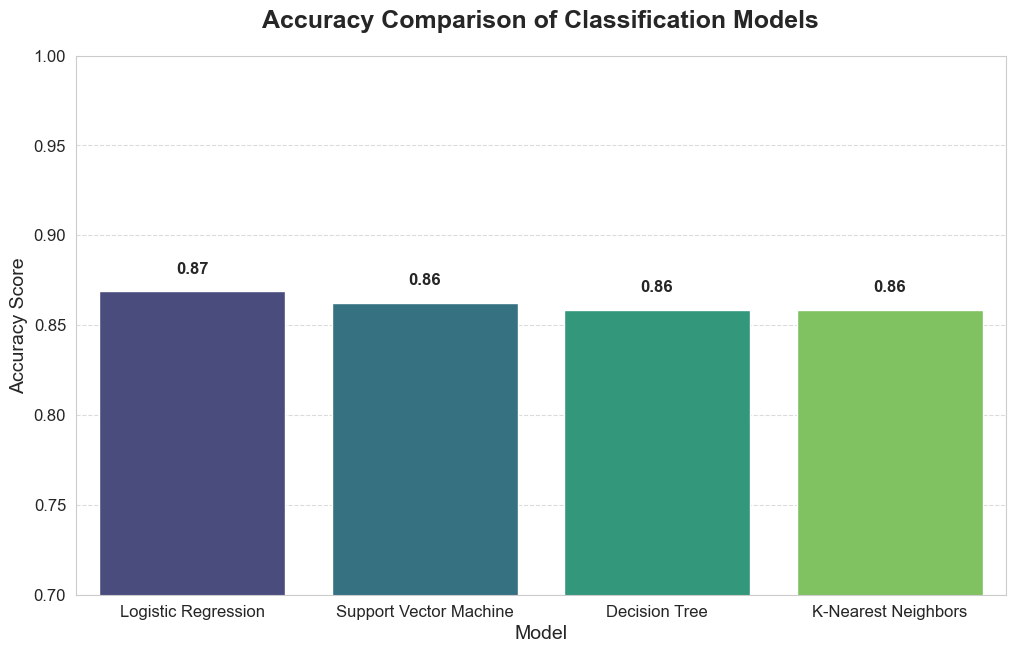

In [85]:
models = ['Logistic Regression', 
          'Support Vector Machine', 
          'Decision Tree', 
          'K-Nearest Neighbors']

accuracy = [accuracy_score(y_test, y_lr_pred), 
            accuracy_score(y_test, y_sv_pred), 
            accuracy_score(y_test, y_tr_pred), 
            accuracy_score(y_test, y_knn_pred)]

plt.figure(figsize=(10,6))

sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 7))
barplot = sns.barplot(x=models, y=accuracy, palette='viridis', hue=models)

# Add value labels on top of bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold')

# Customize labels and title
plt.title('Accuracy Comparison of Classification Models', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.7, 1.0)

# Add a subtle background grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Final Conclusion 



It is observed that the Logistic Regression model performs the best on the test set with an accuracy of 87%. The model can predict the quality of the wine based on the given features with an accuracy of 87%.